<a href="https://colab.research.google.com/github/AmnaShaheena/Bioinformatics-CSH4123-Practical/blob/main/Day05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [23]:
data=pd.read_csv('/content/cancer_expression.csv')

In [14]:
data.head(45)

,Gene,Control1,Control2,Control3,Control4,Control5,Control6,Control7,Control8,Control9,...,Treatment6,Treatment7,Treatment8,Treatment9,Treatment10,Treatment11,Treatment12,Treatment13,Treatment14,Treatment15
0,Gene1,56,97,19,76,65,25,87,91,79,...,63,46,96,64,84,19,66,66,51,66
1,Gene2,8,93,64,18,13,94,57,6,88,...,48,38,78,66,18,99,52,19,76,82
2,Gene3,64,45,33,19,49,69,93,75,13,...,27,66,92,41,48,90,95,39,69,51
3,Gene4,94,46,81,55,67,56,8,98,27,...,66,79,96,93,66,5,31,66,81,7
4,Gene5,63,36,92,56,66,62,56,16,43,...,79,60,21,42,28,73,74,90,15,20
5,Gene6,94,71,23,24,75,56,37,44,43,...,36,13,23,52,84,7,24,28,58,37
6,Gene7,86,70,58,39,84,65,45,37,72,...,31,25,34,32,68,73,65,52,23,8
7,Gene8,41,28,97,50,57,99,64,67,89,...,37,13,47,52,43,97,46,30,54,29
8,Gene9,20,18,80,91,19,96,70,36,91,...,9,72,10,98,51,59,44,56,20,17
9,Gene10,66,27,13,16,5,62,5,38,52,...,98,66,73,80,20,94,94,52,89,43


In [15]:
control_cols=[i for i in data.columns if 'Control' in i]
treatment_cols=[i for i in data.columns if 'Treatment' in i]

print('Column of Controls')
print(control_cols)

print('Column of Treatment')
print(treatment_cols)

Column of Controls
['Control1', 'Control2', 'Control3', 'Control4', 'Control5', 'Control6', 'Control7', 'Control8', 'Control9', 'Control10', 'Control11', 'Control12', 'Control13', 'Control14', 'Control15']
Column of Treatment
['Treatment1', 'Treatment2', 'Treatment3', 'Treatment4', 'Treatment5', 'Treatment6', 'Treatment7', 'Treatment8', 'Treatment9', 'Treatment10', 'Treatment11', 'Treatment12', 'Treatment13', 'Treatment14', 'Treatment15']


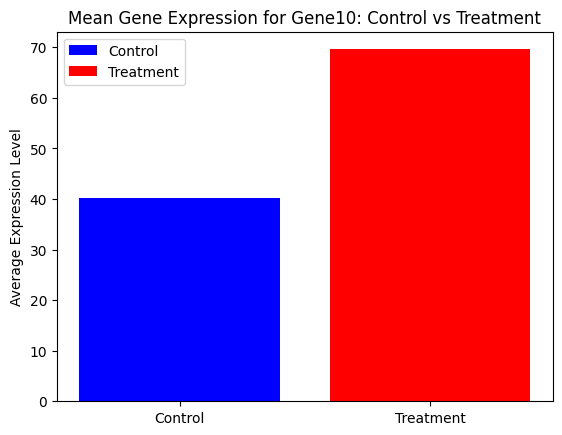

In [16]:
gene='Gene10'

gene_data=data[data['Gene']== gene]

mean_Control=gene_data[control_cols].mean(axis=1).values[0]
mean_Treatment=gene_data[treatment_cols].mean(axis=1).values[0]

plt.bar('Control',mean_Control,color='blue',label='Control')
plt.bar('Treatment',mean_Treatment,color='red',label='Treatment')
plt.ylabel('Average Expression Level')
plt.title(f'Mean Gene Expression for {gene}: Control vs Treatment')
plt.legend(loc='upper left')
plt.show()



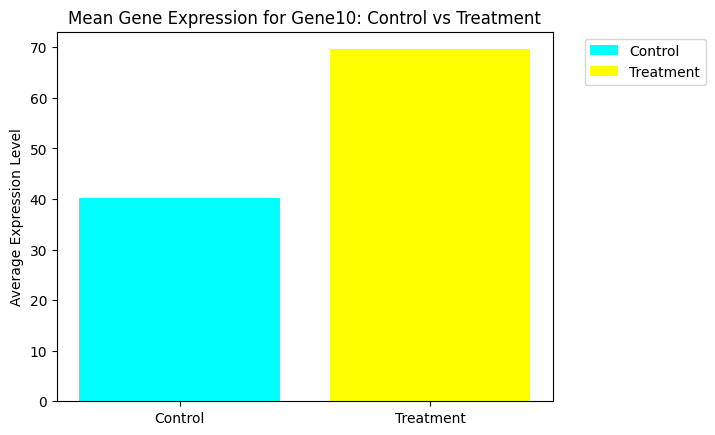

In [17]:
mean_Control=gene_data[control_cols].mean(axis=1).iloc[0]
mean_Treatment=gene_data[treatment_cols].mean(axis=1).iloc[0]

bars=plt.bar(['Control','Treatment'],
             [mean_Control,mean_Treatment],
             color=['cyan','yellow'])

plt.ylabel('Average Expression Level')
plt.title(f'Mean Gene Expression for {gene}: Control vs Treatment')
plt.legend(bars,['Control','Treatment'],
           bbox_to_anchor=(1.05,1),
           loc='upper left')
plt.show()

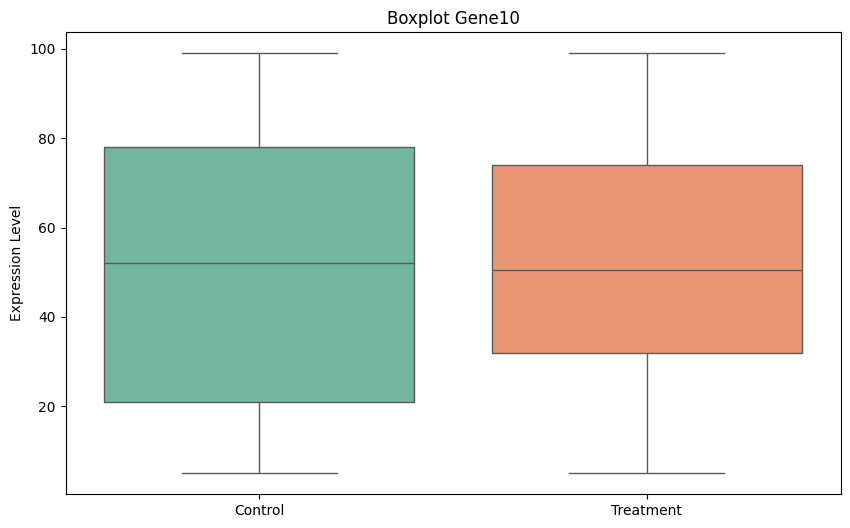

In [18]:
control_data=data[['Control1','Control2']].values.flatten()
treatment_data=data[['Treatment1','Treatment2']].values.flatten()

plt.figure(figsize=(10,6))
sns.boxplot(data=[control_data,treatment_data],palette="Set2")

plt.xticks([0,1],["Control","Treatment"])
plt.title(f'Boxplot {gene}')
plt.ylabel('Expression Level')
plt.show()

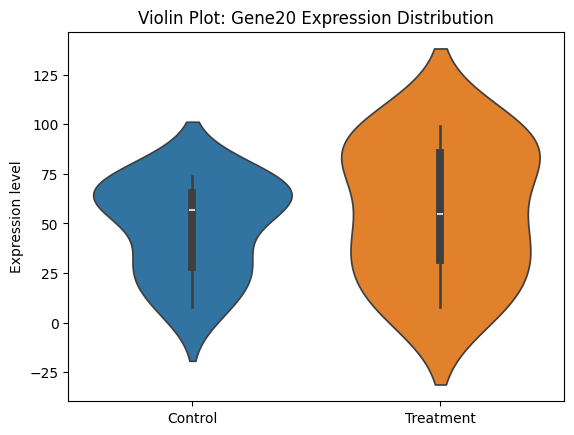

In [21]:
gene='Gene20'
gene_row=data[data['Gene']== gene].iloc[0]

data=[gene_row[control_cols].values,gene_row[treatment_cols].values]

sns.violinplot(data=data)
plt.xticks([0,1],['Control','Treatment'])
plt.ylabel("Expression level")
plt.title(f"Violin Plot: {gene} Expression Distribution")
plt.show()

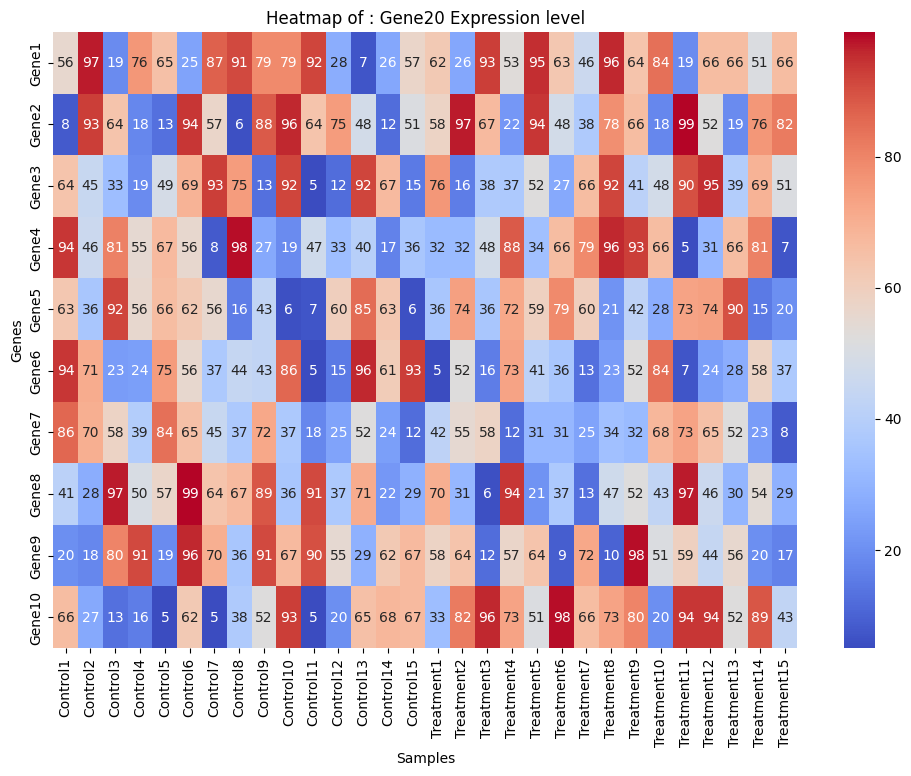

In [24]:
heatmap_data = data.set_index('Gene') #set gene as row
heatmap = heatmap_data.head(10)

plt.figure(figsize = (12,8))
sns.heatmap(heatmap, cmap = "coolwarm", annot=True)
plt.title(f"Heatmap of : {gene} Expression level")
plt.xlabel('Samples')
plt.ylabel('Genes')
plt.show()